In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import numpy as np
import jax.numpy as jnp

from utils import manifold, metrics
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

In [61]:
rng = np.random.default_rng(0)
theta = 2 * np.pi * rng.uniform(size=(200,200))
E = rng.uniform(size=(200))
data = np.sqrt(2*E[:, None, None]) * np.stack([np.cos(theta), np.sin(theta)], axis=-1)

# Full phase space

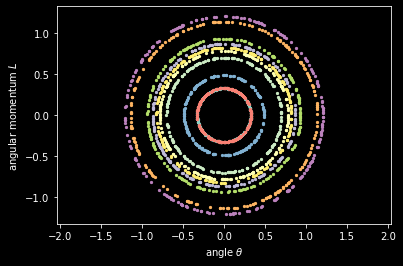

In [62]:
out_name = "sho_full"

for traj in data[:10]:
    plt.scatter(traj[:,0], traj[:,1], s=5.)
plt.xlabel(r"angle $\theta$")
plt.ylabel(r"angular momentum $L$")
plt.axis('equal');

Converged? True
[]


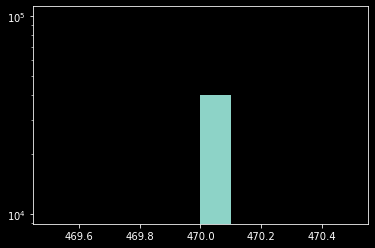

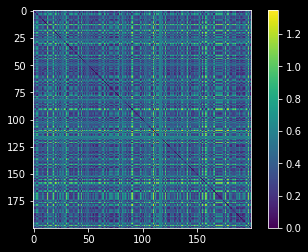

In [38]:
dist_mat, converged, steps = metrics.distance_matrix(data, mesh_shape=(4,2))

print("Converged?", jnp.all(converged))
print(np.stack(np.where(1-converged), axis=1))

plt.figure()
plt.hist([steps.reshape(-1)], log=True)

plt.figure()
plt.imshow(dist_mat)
plt.colorbar();

In [63]:
# np.savez(out_name + "_dist_mat.npz", dist_mat=dist_mat)
# dist_mat = np.load(out_name + "_dist_mat.npz")['dist_mat']

In [64]:
evals, embedding, epsilon = manifold.diffusion_map(dist_mat, n_components=20, epsilon='max', n_neighbors=20, alpha=1, robust=True)

nn_max = 0.31028157472610474
epsilon = 0.19254931122902263
mean_shift = 0.013074267


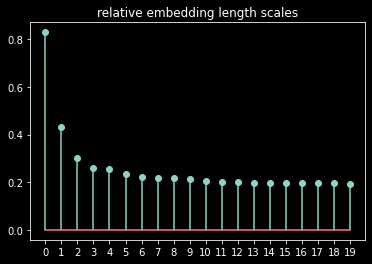

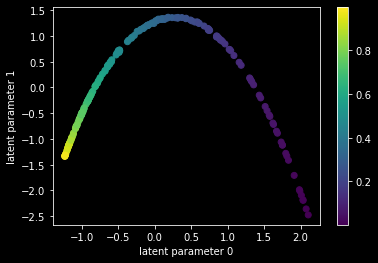

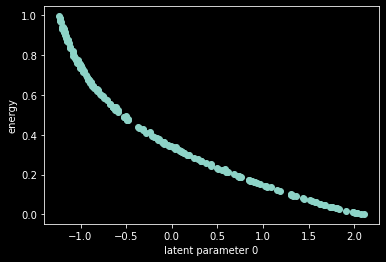

In [65]:
plt.figure()
# plt.stem(1/np.sqrt(-evals), use_line_collection=True)
plt.stem(np.sqrt(-epsilon/np.log(1+evals)), use_line_collection=True)
plt.title('relative embedding length scales')
plt.xticks(ticks=range(evals.shape[0]))

plt.figure()
plt.scatter(embedding[:,0], embedding[:,1], c=E)
plt.xlabel("latent parameter 0")
plt.ylabel("latent parameter 1")
plt.colorbar()

plt.figure()
plt.scatter(embedding[:,0], E)
plt.xlabel("latent parameter 0")
plt.ylabel("energy");

[0]


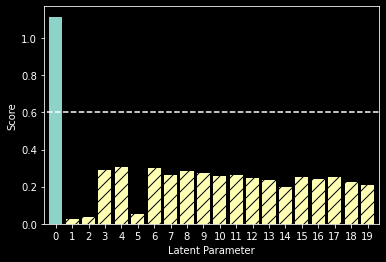

In [66]:
threshold = 0.6
n_components = evals.shape[0]

embed_list, scores_pass, scores_fail = manifold.heuristic_importance_score(evals, embedding, threshold=threshold, weights="adjusted")
print(embed_list)

plt.bar(list(range(n_components)), scores_pass)
plt.bar(list(range(n_components)), scores_fail, hatch='//')
plt.xticks(ticks=range(n_components))
plt.xlim(-0.7, n_components-0.3)
# plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Latent Parameter")
plt.hlines(threshold, -1, n_components, 'white', linestyles='dashed');
# plt.savefig("unpredictability_scores.png", dpi=300)

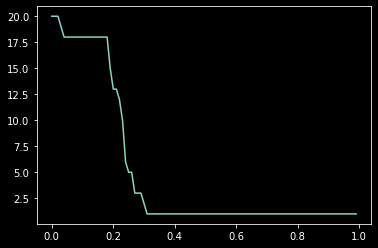

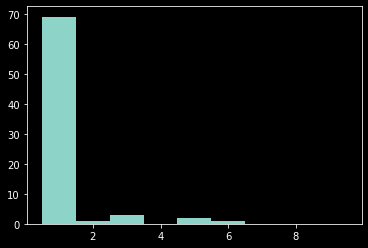

In [67]:
embedding_size_list = []
for thres in np.arange(0.0, 1., 0.01):
    embedding_size_list.append(len(manifold.heuristic_importance_score(evals, embedding, threshold=thres, weights="adjusted")[0]))

plt.figure()
plt.plot(np.arange(0.0, 1., 0.01), embedding_size_list)
plt.figure()
plt.hist(embedding_size_list, bins=np.arange(10)+0.5);

R^2 = 0.9994543293041636
Coefficent(s): [0.62272555]


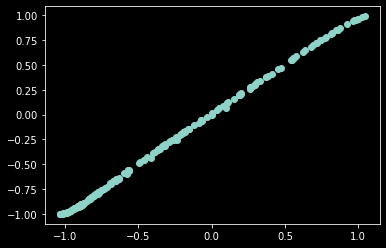

In [68]:
from sklearn.linear_model import LinearRegression
X = embedding[:, embed_list]
y = np.cos(np.pi*np.sqrt(E))
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)
plt.figure()
plt.scatter(reg.predict(X), y);

sho_full


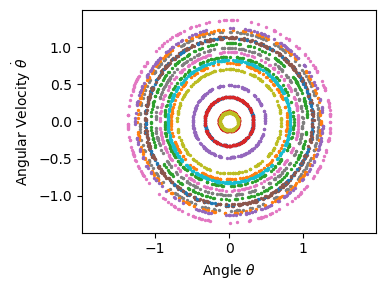

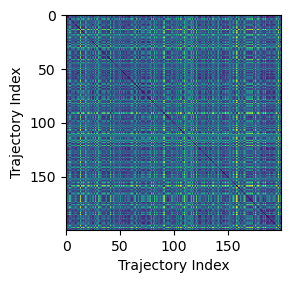

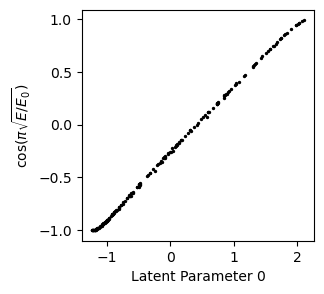

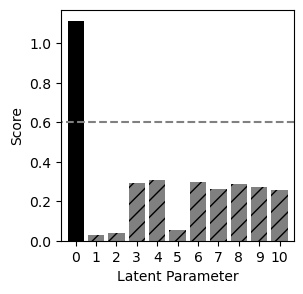

In [69]:
print(out_name)
with plt.style.context("default"):
    plt.figure(figsize=(4, 3))
    for traj in data[:20]:
        plt.scatter(traj[:, 0], traj[:, 1], s=2)
    plt.xlabel(r"Angle $\theta$")
    plt.ylabel(r"Angular Velocity $\dot\theta$")
    # plt.axis('off')
    plt.axis("equal")
    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_data.pdf", bbox_inches="tight")

    plt.figure(figsize=(3, 3))
    plt.imshow(dist_mat)
    plt.xlabel("Trajectory Index")
    plt.ylabel("Trajectory Index")
    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_dist_mat.pdf", bbox_inches="tight")

    plt.figure(figsize=(3, 3))
    plt.scatter(embedding[:, 0], np.cos(np.pi*np.sqrt(E)), c="k", s=2)
    plt.xlabel("Latent Parameter 0")
    plt.ylabel("$\cos(\pi\sqrt{E/E_0})$")
    plt.savefig(f"figures/{out_name}_embedding.pdf", bbox_inches="tight")

    plt.figure(figsize=(3, 3))
    n_show_components = 11
    plt.bar(
        list(range(n_components)[:n_show_components]),
        scores_pass[:n_show_components],
        color="k",
    )
    plt.bar(
        list(range(n_components)[:n_show_components]),
        scores_fail[:n_show_components],
        hatch="//",
        color="gray",
    )
    plt.xticks(ticks=range(n_components)[:n_show_components])
    plt.xlim(-0.7, n_show_components - 0.3)
    # plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.xlabel("Latent Parameter")
    plt.hlines(threshold, -1, n_show_components, "gray", linestyles="dashed")
    plt.savefig(f"figures/{out_name}_score.pdf", bbox_inches="tight")


# Position only

In [70]:
out_name = "sho_pos_only"
data = data[...,[0]]

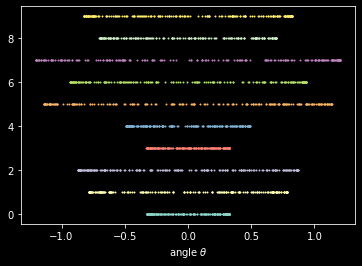

In [71]:
for i, traj in enumerate(data[:10]):
    plt.scatter(traj[:,0], i*np.ones_like(traj[:,0]), s=1)
plt.xlabel(r"angle $\theta$");

Converged? True
[]


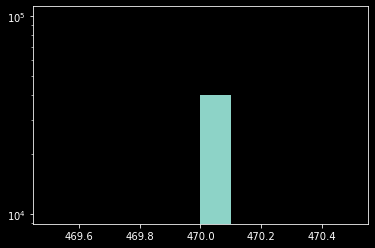

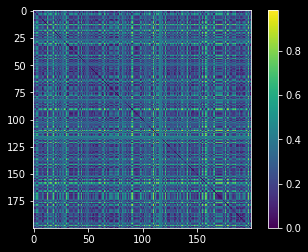

In [50]:
dist_mat, converged, steps = metrics.distance_matrix(data, mesh_shape=(4,2))

print("Converged?", jnp.all(converged))
print(np.stack(np.where(1-converged), axis=1))

plt.figure()
plt.hist([steps.reshape(-1)], log=True)

plt.figure()
plt.imshow(dist_mat)
plt.colorbar();

In [72]:
# np.savez(out_name + "_dist_mat.npz", dist_mat=dist_mat)
# dist_mat = np.load(out_name + "_dist_mat.npz")['dist_mat']

In [79]:
evals, embedding, epsilon = manifold.diffusion_map(dist_mat, n_components=20, epsilon='max', n_neighbors=20, alpha=1, robust=True)

nn_max = 0.21932902932167053
epsilon = 0.09621044620637242
mean_shift = 0.012538181


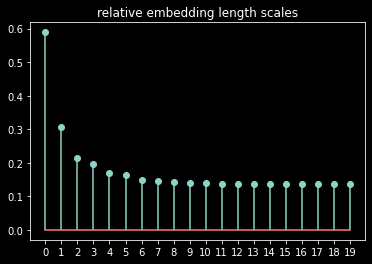

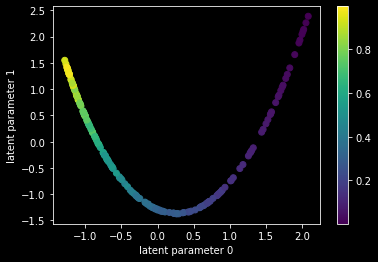

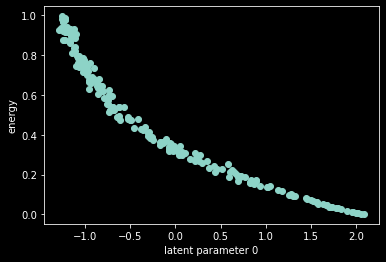

In [80]:
plt.figure()
# plt.stem(1/np.sqrt(-evals), use_line_collection=True)
plt.stem(np.sqrt(-epsilon/np.log(1+evals)), use_line_collection=True)
plt.title('relative embedding length scales')
plt.xticks(ticks=range(evals.shape[0]))

plt.figure()
plt.scatter(embedding[:,0], embedding[:,1], c=E)
plt.xlabel("latent parameter 0")
plt.ylabel("latent parameter 1")
plt.colorbar()

plt.figure()
plt.scatter(embedding[:,0], E)
plt.xlabel("latent parameter 0")
plt.ylabel("energy");

[0]


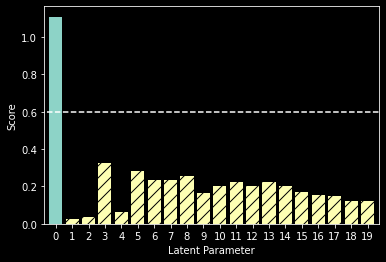

In [81]:
threshold = 0.6
n_components = evals.shape[0]

embed_list, scores_pass, scores_fail = manifold.heuristic_importance_score(evals, embedding, threshold=threshold, weights="adjusted")
print(embed_list)

plt.bar(list(range(n_components)), scores_pass)
plt.bar(list(range(n_components)), scores_fail, hatch='//')
plt.xticks(ticks=range(n_components))
plt.xlim(-0.7, n_components-0.3)
# plt.ylim(0, 1)
plt.ylabel("Score")
plt.xlabel("Latent Parameter")
plt.hlines(threshold, -1, n_components, 'white', linestyles='dashed');

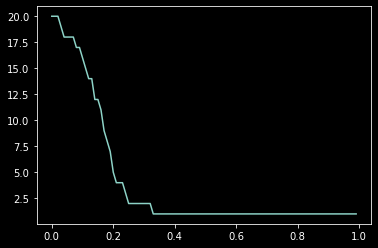

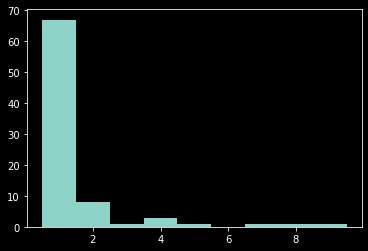

In [82]:
embedding_size_list = []
for thres in np.arange(0.0, 1., 0.01):
    embedding_size_list.append(len(manifold.heuristic_importance_score(evals, embedding, threshold=thres, weights="adjusted")[0]))

plt.figure()
plt.plot(np.arange(0.0, 1., 0.01), embedding_size_list)
plt.figure()
plt.hist(embedding_size_list, bins=np.arange(10)+0.5);

R^2 = 0.9961126213416828
Coefficent(s): [0.6235677]


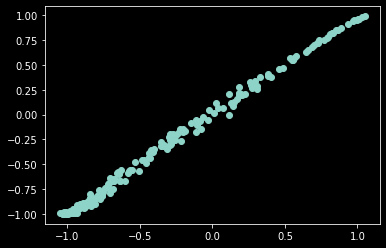

In [83]:
from sklearn.linear_model import LinearRegression
X = embedding[:, embed_list]
y = np.cos(np.pi*np.sqrt(E))
reg = LinearRegression().fit(X, y)
print("R^2 =", reg.score(X, y))
print("Coefficent(s):", reg.coef_)
plt.figure()
plt.scatter(reg.predict(X), y);

sho_pos_only


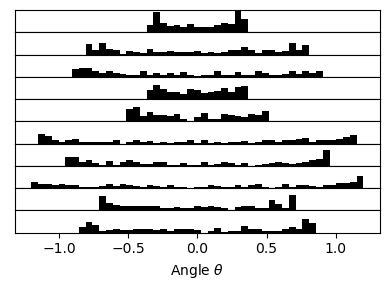

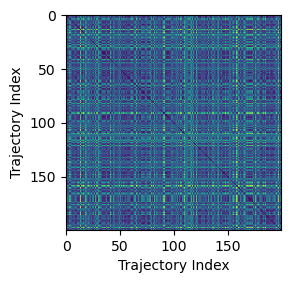

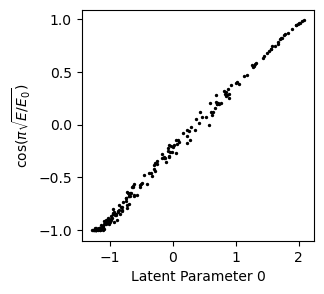

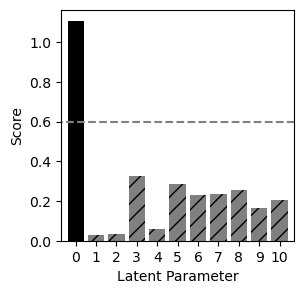

In [84]:
print(out_name)
with plt.style.context("default"):
    fig = plt.figure(figsize=(4, 3))
    gs = fig.add_gridspec(10, hspace=0)
    axs = gs.subplots(sharex=True, sharey=True)

    for i, traj in enumerate(data[:10, :, 0]):
        axs[i].hist(traj, bins=np.linspace(-1.2, 1.2, 50), color='k')
    plt.xlabel(r"Angle $\theta$")
    plt.yticks([])
    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_data.pdf", bbox_inches="tight")

    plt.figure(figsize=(3, 3))
    plt.imshow(dist_mat)
    plt.xlabel("Trajectory Index")
    plt.ylabel("Trajectory Index")
    plt.tight_layout()
    plt.savefig(f"figures/{out_name}_dist_mat.pdf", bbox_inches="tight")

    plt.figure(figsize=(3, 3))
    plt.scatter(embedding[:, 0], np.cos(np.pi*np.sqrt(E)), c="k", s=2)
    plt.xlabel("Latent Parameter 0")
    plt.ylabel("$\cos(\pi\sqrt{E/E_0})$")
    plt.savefig(f"figures/{out_name}_embedding.pdf", bbox_inches="tight")

    plt.figure(figsize=(3, 3))
    n_show_components = 11
    plt.bar(
        list(range(n_components)[:n_show_components]),
        scores_pass[:n_show_components],
        color="k",
    )
    plt.bar(
        list(range(n_components)[:n_show_components]),
        scores_fail[:n_show_components],
        hatch="//",
        color="gray",
    )
    plt.xticks(ticks=range(n_components)[:n_show_components])
    plt.xlim(-0.7, n_show_components - 0.3)
    # plt.ylim(0, 1)
    plt.ylabel("Score")
    plt.xlabel("Latent Parameter")
    plt.hlines(threshold, -1, n_show_components, "gray", linestyles="dashed")
    plt.savefig(f"figures/{out_name}_score.pdf", bbox_inches="tight")
